<a href="https://colab.research.google.com/github/calebdhuang/fall-detection-/blob/main/DSCI_303_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fadeel Khan, Caleb Huang, Matthew Su
## DSCI 303 HW 4 - Exploratory Data Analysis

#Importing *Dataset*

In [ ]:
#Fadeel Khan, Caleb Huang, Matthew Su
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import necessary libraries
import pandas as pd
import os
import glob

# Import pre-processed data  
master = pd.read_csv('/content/drive/Shareddrives/DSCI303/master_dataset.csv')
master = master.drop(columns = ['Unnamed: 0'])
master

label     acc_x      acc_y     acc_z    gyro_x    gyro_y    gyro_z  \
0      STD -0.854436   9.642310 -2.250488  0.004283  0.000140  0.007415   
1      STD  1.055158   9.685528  1.733203  0.002060  0.001796  0.009070   
2      STD -2.135354   9.659697  0.082741 -0.003259 -0.002110  0.004561   
3      STD -2.098517   9.567071  1.188102 -0.016764  0.001900  0.008769   
4      STD  1.643435   9.790809 -0.278615 -0.002561 -0.004125  0.004378   
...    ...       ...        ...       ...       ...       ...       ...   
8231   SDL -1.614871   3.619486  5.292432 -0.407888  0.475601 -0.145117   
8232   STD  2.054522   9.699086  0.133555 -0.181134  0.085751  0.009688   
8233   LYI -7.496127  -0.954398  5.997271 -0.007828 -0.018037  0.009056   
8234   SDL -3.730302   3.069642  5.021443 -0.538789  0.350284 -0.094782   
8235   STD -1.399266  10.112025  1.050717 -0.014155 -0.036117 -0.030202   

         azimuth       pitch       roll  ...  jerk_Facc_z  jerk_Fgyro_x  \
0     306.164137 -104.041694  -4.930065  ...     0.224490      0.039122   
1     293.992181  -78.026729   6.115445  ...     0.244479      0.121223   
2     105.837462  -86.562022 -12.094852  ...     0.321017      0.095744   
3      46.677027  -73.325690 -16.421131  ...     0.180347      0.034797   
4     265.318943  -98.935069   9.453252  ...     0.128879      0.029659   
...          ...         ...        ...  ...          ...           ...   
8231  240.184677  -26.478097  -7.319636  ...     9.878486      1.616140   
8232  252.279227  -41.790419 -21.487358  ...   188.795136     34.629590   
8233  257.736227    6.139357 -49.575215  ...    16.426087      3.970988   
8234  253.217327  -24.840463 -26.467930  ...     6.671080      1.579303   
8235  239.312780  -49.442869 -29.559112  ...   185.199440     34.981985   

      jerk_Fgyro_y  jerk_Fgyro_z  jerk_Fazimuth  jerk_Fpitch  jerk_Froll  \
0         0.058791      0.029565      23.754628     6.376173    2.693552   
1         0.120939      0.036666      16.764187     4.791044    2.325317   
2         0.206433      0.061043       8.301730    16.300686    1.844404   
3         0.063123      0.030626      21.982975     2.620552    1.006353   
4         0.046507      0.026777       8.427963     5.887029    1.619819   
...            ...           ...            ...          ...         ...   
8231      3.162145      1.178608       9.071858     2.132893    7.389333   
8232     41.967951     27.664550    2906.615780   572.227099  795.690569   
8233      5.215307      4.135967      36.486733    61.784799   35.265612   
8234      2.845252      1.991766      15.350096    18.901771    2.263543   
8235     42.343241     33.682171    2782.177737   567.349678  766.303109   

      F_JerkMagAcc  F_JerkMagGyro  F_JerkMagOrient  
0         0.405974       0.076557        24.742537  
1         0.448741       0.175116        17.589746  
2         0.660672       0.235601        18.385671  
3         0.395839       0.078315        22.161481  
4         0.345504       0.061315        10.407281  
...            ...            ...              ...  
8231     15.452782       3.741682        11.893279  
8232    343.770523      61.039698      3067.406498  
8233     33.605760       7.750767        79.951901  
8234     13.836533       3.815336        24.454570  
8235    338.268236      64.429635      2941.023473  

[8236 rows x 79 columns]

# Finding the Best Features through Sequential Feature Selection

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectFromModel

# Seperating features and variables
y = master[['label']]
X = master.drop(columns = 'label')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Modeling using raw data
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(classification_report(y_test, pred))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         BSC       0.87      0.77      0.82        35
         CHU       1.00      0.96      0.98        25
         CSI       0.97      0.98      0.98        61
         CSO       1.00      1.00      1.00        67
         FKL       0.90      0.93      0.91        46
         FOL       0.84      0.71      0.77        45
         JOG       1.00      0.95      0.97        40
         JUM       0.97      1.00      0.98        30
         LYI       0.88      0.91      0.90       150
         SCH       0.99      1.00      0.99        80
         SDL       0.59      0.77      0.67        39
         SIT       0.94      0.90      0.92       242
         STD       0.99      1.00      1.00       644
         STN       0.85      0.77      0.81        69
         STU       0.79      0.84      0.82        63
         WAL       1.00      0.92      0.96        12

    accuracy                           0.94      1648
   macro avg       0.91   

In [ ]:
! pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


We looked at forward and backward sequential feature selection and got recommendations for which features would be the best for predicting our labels.

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html#sklearn.feature_selection.SequentialFeatureSelector.get_support

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
sfs = SequentialFeatureSelector(knn, direction='backward')
sfs = sfs.fit(X_train, y_train)



/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

KeyboardInterrupt: ignored

In [ ]:
import numpy as np
support = np.array([False, False, False, False, False, False, False, False, 
                    False, False, False, False, False, False, False, True,
                    False, False, False, False,  True, False,  True, False,
                    True, False, False,  True,  True,  True,  True,  True,
                    False, False,  True, True, True,  True,  True, False,
                    False,  True, False,  True, False,  True,  True, False,
                    True,  True,  True,  True,  True,  True, False,  True,
                    False, False, False, False, False, False, False, False,
                    True, True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True])
# support = sfs.get_support()
print(support)

In [ ]:
mid = master.drop(columns = 'label')
ind = mid.columns.values
new_features = ind[support]
new_columns = np.insert(new_features, 0, 'label', axis=0)
new_master = master[new_columns]
new_master

label  max_azimuth  min_acc_z  min_gyro_y  min_azimuth   jerk_acc_x  \
0      STD    359.99396  -2.816139   -0.393092     0.000000  -170.887136   
1      STD    319.78073   0.141682   -2.244319     0.000000   211.035277   
2      STD    209.99599  -1.756481   -1.630705    91.299065  -426.472240   
3      STD    359.95996   0.461114   -0.411418     0.314409  -419.388391   
4      STD    270.56970  -1.301095   -0.195477   210.212880   328.281078   
...    ...          ...        ...         ...          ...          ...   
8231   SDL    256.98718  -1.489760   -4.805677   206.351820  -323.139374   
8232   STD    266.36792  -0.095699   -0.289856   246.604190   411.114347   
8233   LYI    261.54850   5.096840   -0.504880   251.912350 -1499.982028   
8234   SDL    269.41034  -6.780667   -2.477670   222.739120  -746.436919   
8235   STD    248.84558   0.473783   -0.438296   234.595050  -279.994511   

       jerk_acc_y   jerk_acc_z  jerk_gyro_x  jerk_gyro_y  ...  jerk_Facc_z  \
0     1928.461313  -450.097346     0.856549     0.028076  ...     0.224490   
1     1937.138501   346.646585     0.411907     0.359236  ...     0.244479   
2     1929.231962    16.524929    -0.650810    -0.421426  ...     0.321017   
3     1911.977797   237.442093    -3.350255     0.379761  ...     0.180347   
4     1955.743875   -55.654174    -0.511556    -0.824025  ...     0.128879   
...           ...          ...          ...          ...  ...          ...   
8231   724.267310  1059.027519   -81.619373    95.168791  ...     9.878486   
8232  1940.808711    26.724729   -36.245351    17.158935  ...   188.795136   
8233  -190.975851  1200.059419    -1.566466    -3.609196  ...    16.426087   
8234   614.238214  1004.795314  -107.812090    70.092097  ...     6.671080   
8235  2023.425631   210.249531    -2.832407    -7.227126  ...   185.199440   

      jerk_Fgyro_x  jerk_Fgyro_y  jerk_Fgyro_z  jerk_Fazimuth  jerk_Fpitch  \
0         0.039122      0.058791      0.029565      23.754628     6.376173   
1         0.121223      0.120939      0.036666      16.764187     4.791044   
2         0.095744      0.206433      0.061043       8.301730    16.300686   
3         0.034797      0.063123      0.030626      21.982975     2.620552   
4         0.029659      0.046507      0.026777       8.427963     5.887029   
...            ...           ...           ...            ...          ...   
8231      1.616140      3.162145      1.178608       9.071858     2.132893   
8232     34.629590     41.967951     27.664550    2906.615780   572.227099   
8233      3.970988      5.215307      4.135967      36.486733    61.784799   
8234      1.579303      2.845252      1.991766      15.350096    18.901771   
8235     34.981985     42.343241     33.682171    2782.177737   567.349678   

      jerk_Froll  F_JerkMagAcc  F_JerkMagGyro  F_JerkMagOrient  
0       2.693552      0.405974       0.076557        24.742537  
1       2.325317      0.448741       0.175116        17.589746  
2       1.844404      0.660672       0.235601        18.385671  
3       1.006353      0.395839       0.078315        22.161481  
4       1.619819      0.345504       0.061315        10.407281  
...          ...           ...            ...              ...  
8231    7.389333     15.452782       3.741682        11.893279  
8232  795.690569    343.770523      61.039698      3067.406498  
8233   35.265612     33.605760       7.750767        79.951901  
8234    2.263543     13.836533       3.815336        24.454570  
8235  766.303109    338.268236      64.429635      2941.023473  

[8236 rows x 40 columns]

In [ ]:
# Separating features and variables
y = new_master[['label']]
X = new_master.drop(columns = 'label')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Modeling using raw data
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(classification_report(y_test, pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         BSC       0.73      0.54      0.62        35
         CHU       0.96      0.96      0.96        25
         CSI       0.71      0.89      0.79        61
         CSO       0.90      0.97      0.94        67
         FKL       0.74      0.87      0.80        46
         FOL       0.77      0.53      0.63        45
         JOG       1.00      1.00      1.00        40
         JUM       1.00      1.00      1.00        30
         LYI       0.90      0.92      0.91       150
         SCH       0.97      0.94      0.96        80
         SDL       0.69      0.64      0.67        39
         SIT       0.95      0.92      0.93       242
         STD       0.99      1.00      1.00       644
         STN       0.65      0.71      0.68        69
         STU       0.64      0.59      0.61        63
         WAL       1.00      0.92      0.96        12

    accuracy                           0.91      1648
   macro avg       0.85   

## Visualizing Correlations

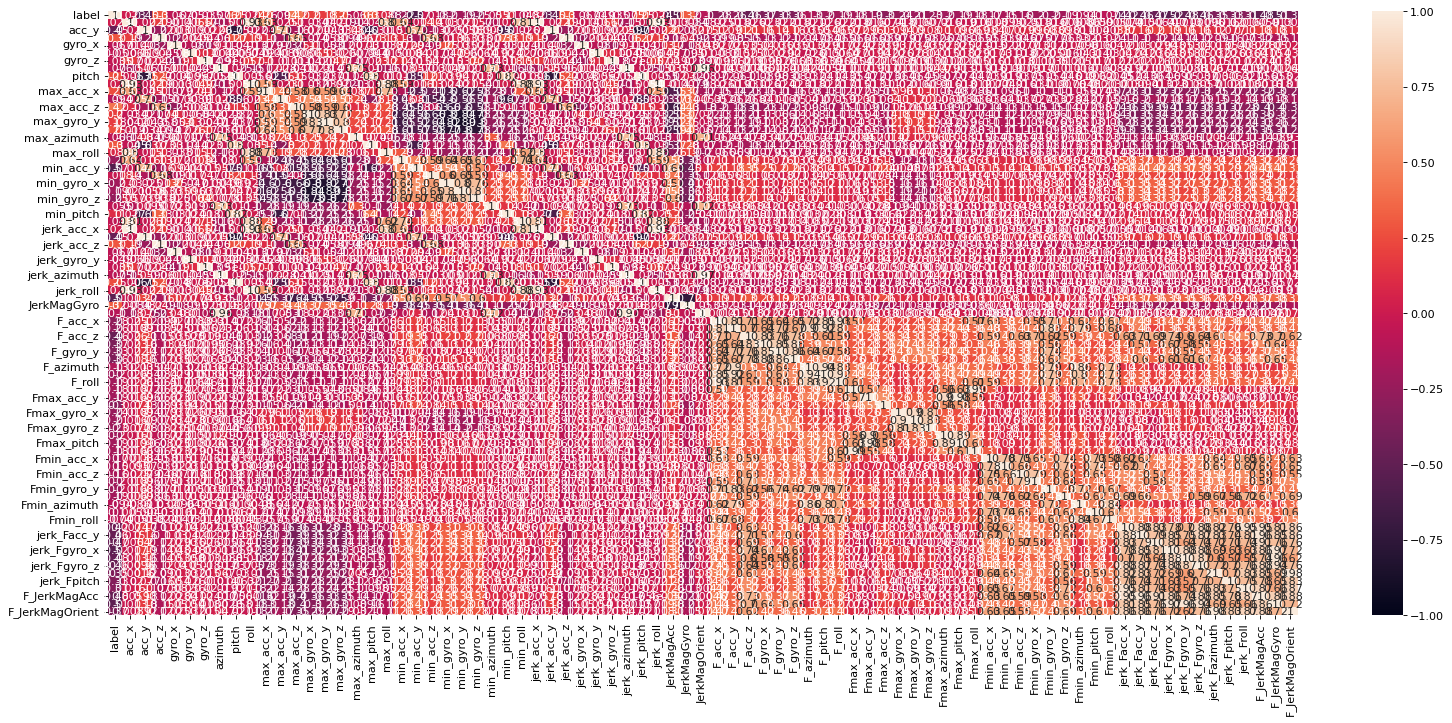

In [ ]:
# Heat map to visualize correlatiion between all features
import matplotlib.pyplot as plt
import seaborn as sns
master['label'].replace(['STD', 'WAL', 'JOG', 'JUM', 'STU', 'STN', 'SCH', 'SIT', 'CHU', 'CSI', 'CSO', 'FKL', 'FOL', 'BSC', 'SDL','LYI'],[0, 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],inplace=True)
plt.figure(figsize=(24, 10), dpi=80)
sns.heatmap(master.corr(), vmin=-1, vmax=1, annot=True)


In [ ]:
#extract features with correlation higher than .2 with the label
c = master.corr().abs()
s = c.unstack()
sorted = s['label'].sort_values(ascending=False)
top = sorted[sorted > 0.2]
top = top.reset_index(drop=False)
new_columns = top['index']
new_master = master[new_columns]


# Seperating features and variables
y = new_master[['label']]
X = new_master.drop(columns = 'label')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Modeling using raw data
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(classification_report(y_test, pred))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       644
           1       1.00      0.92      0.96        12
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        30
           4       0.71      0.75      0.73        63
           5       0.77      0.72      0.75        69
           6       0.74      0.96      0.84        80
           7       0.98      0.89      0.93       242
           8       1.00      0.04      0.08        25
           9       0.80      0.87      0.83        61
          10       0.86      0.82      0.84        67
          11       0.80      0.80      0.80        46
          12       0.71      0.53      0.61        45
          13       0.79      0.77      0.78        35
          14       0.52      0.67      0.58        39
          15       0.87      0.97      0.92       150

    accuracy                           0.90      1648
   macro avg       0.85   

## After looking at the correlations, we are setting an absolute threshold correlation of 0.2 so that any feature greater than or equal to 0.2 would be included in our further modeling. These features include:

- acc_y
- acc_z
- pitch
- max_acc_x
- max_acc_z
- max_gyro_x
- max_gyro_z
- max_pitch
- min_acc_x
- min_acc_y
- min_gyro_x
- min_gyro_z

# Looking at Missing Data and Skewness

## Note: since the data is sourced from live sensors, there is not any "missing data". Rather, principles of signal processing have been applied in this EDA.

In [ ]:
# Finding missing data
df_na = (master.isnull().sum() / len(master)) * 100
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :df_na})
missing_data.head(20) # No missing data

Empty DataFrame
Columns: [Missing Ratio]
Index: []

In [ ]:
from scipy.stats import skew
variables = master[['acc_x',	'acc_y',	'acc_z',	'gyro_x',	'gyro_y',	'gyro_z',	'azimuth',	'pitch',	'roll']]
numeric_feats = variables.dtypes[master.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = variables[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



Skew
pitch    1.067742
azimuth  0.076520
acc_x   -0.078218
roll    -0.094764
acc_z   -0.108711
gyro_x  -0.151858
gyro_z  -0.167895
gyro_y  -0.748881
acc_y   -1.011630

After looking at skewness, we determined that our data did not have enough skewness (not more than an absolute value of 1.1) so we do not have to correct for this.

Now, using the features recommended by sequential feature selection, we make our model again:

In [ ]:
# Seperating features and variables
y = master[['label']]
X = master.drop(columns = 'label')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Modeling using raw data
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(classification_report(y_test, pred))

NameError: ignored

# Visualizing Seperability in 3 Dimensions

##For data visualization, we decided it would be better to visualize the separability between the classes of activities of daily living. We also visualized the separability between the activities that led to falls and the activities that didn't lead to falls. Both graphs below indciate clear separability between the different classes in our data that we're analyzing. Since our data is based on classes and not continuous, we are not looking at distributions.

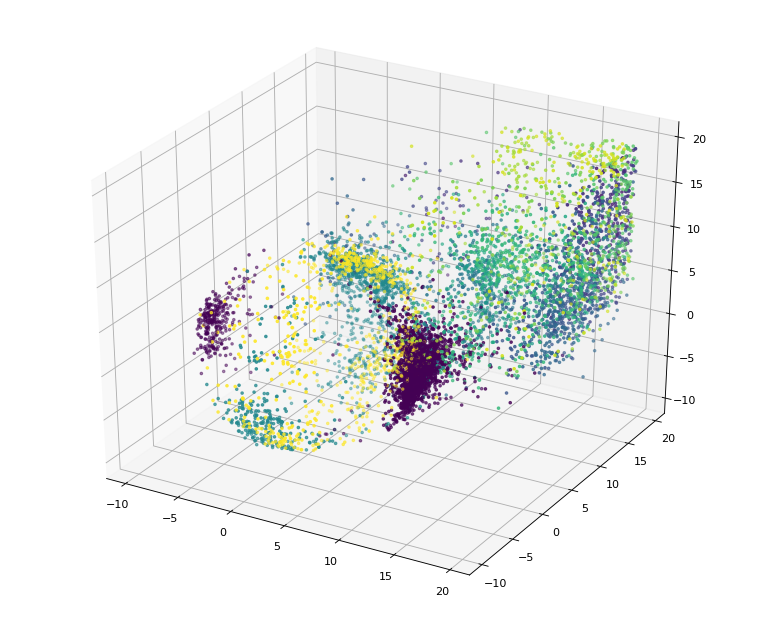

In [ ]:
# Visualizing the classes/activities
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
A= master['label'].replace(['STD', 'WAL', 'JOG', 'JUM', 'STU', 'STN', 'SCH', 'SIT', 'CHU', 'CSI', 'CSO', 'FKL', 'FOL', 'BSC', 'SDL','LYI'],[0, 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
fig=figure(figsize=(12, 10), dpi=80)
ax = fig.add_subplot(projection='3d')
ax.scatter(master[['max_acc_y']], master[['max_acc_z']], master[['max_acc_x']], c=A, s= 5)
#ax.scatter(processed[['']], processed[['SMV_gyro']], processed[['SMV_orient']], c=A)

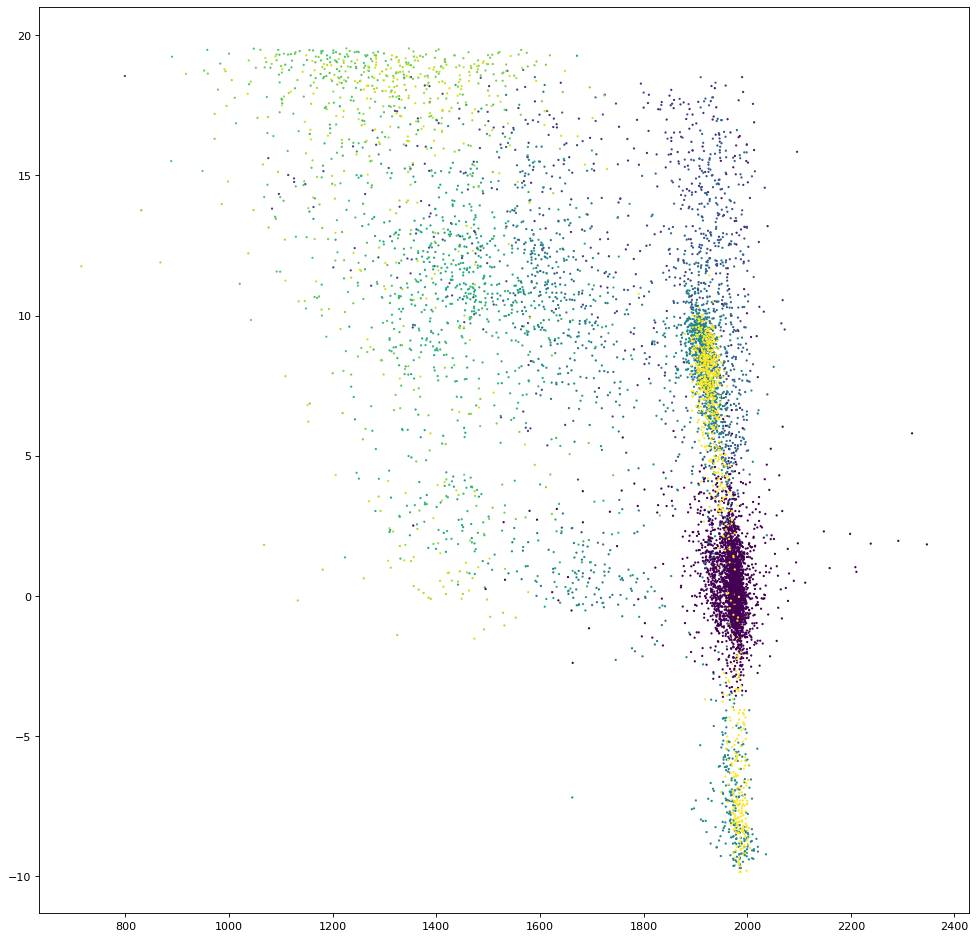

In [ ]:
#2D scatterplot visualization

from matplotlib.pyplot import figure

figure(figsize=(15,15), dpi=80)
plt.scatter(master[['JerkMagAcc']], master[['max_acc_z']], c=A, s = 1)
#master.columns

After looking at seperability of all of our classes, we wanted to look at the separability of our data for the TWO binary classes: Falling vs. Not Falling. We first classified all of our falling data as 1 and all of our non-falling data (i.e., activities that did not have a fall) as 0. Then we were able to visualize it.

In [ ]:
master['label'].replace(['STD', 'WAL', 'JOG', 'JUM', 'STU', 'STN', 'SCH', 'SIT', 'CHU', 'CSI', 'CSO', 'LYI'],0,inplace=True)
master['label'].replace(['FKL', 'FOL', 'BSC', 'SDL'],1,inplace=True)

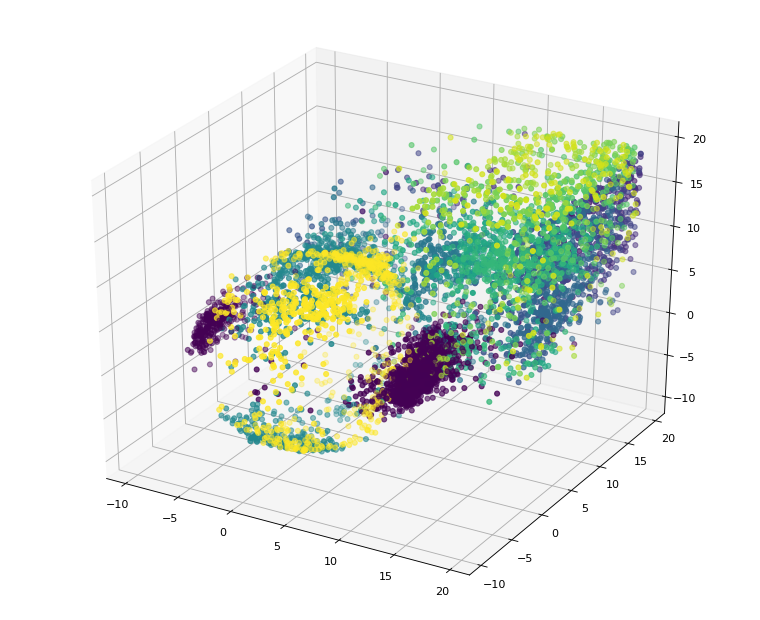

In [ ]:
# Visualizing the classes/activities
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
fig=figure(figsize=(12, 10), dpi=80)
ax = fig.add_subplot(projection='3d')
ax.scatter(master[['max_acc_y']], master[['max_acc_x']], master[['max_acc_z']], c=master[['label']])

In [ ]:
master

0        0
1        0
2        0
3        0
4        0
        ..
8231    14
8232     0
8233    15
8234    14
8235     0
Name: label, Length: 8236, dtype: int64


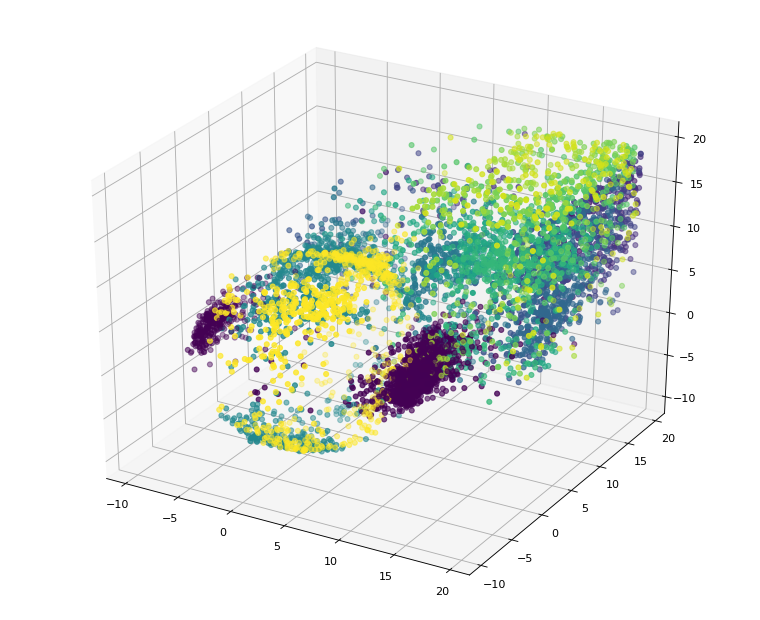

In [ ]:
master_binary = master.copy()

master_binary['label'].replace(['STD', 'WAL', 'JOG', 'JUM', 'STU', 'STN', 'SCH', 'SIT', 'CHU', 'CSI', 'CSO', 'LYI'],0,inplace=True)
master_binary['label'].replace(['FKL', 'FOL', 'BSC', 'SDL'],1,inplace=True)
fig=figure(figsize=(12, 10), dpi=80)
ax = fig.add_subplot(projection='3d')
ax.scatter(master_binary[['max_acc_y']], master_binary[['max_acc_x']], master_binary[['max_acc_z']], c=master[['label']])



# Looking at Missing Data and Skewness

## Note: since the data is sourced from live sensors, there is not any "missing data". Rather, principles of signal processing have been applied in this EDA.

In [ ]:
# Finding missing data
df_na = (master.isnull().sum() / len(master)) * 100
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :df_na})
missing_data.head(20) # No missing data

Empty DataFrame
Columns: [Missing Ratio]
Index: []

In [ ]:
from scipy.stats import skew
variables = master[['acc_x',	'acc_y',	'acc_z',	'gyro_x',	'gyro_y',	'gyro_z',	'azimuth',	'pitch',	'roll']]
numeric_feats = variables.dtypes[master.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = variables[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



Skew
pitch    1.067742
azimuth  0.076520
acc_x   -0.078218
roll    -0.094764
acc_z   -0.108711
gyro_x  -0.151858
gyro_z  -0.167895
gyro_y  -0.748881
acc_y   -1.011630

After looking at skewness, we determined that our data did not have enough skewness (not more than an absolute value of 1.1) so we do not have to correct for this.

#KNN Model
####Testing different values for K

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X = master[['acc_y', 'acc_z', 'pitch', 'max_acc_x','max_acc_z', 'max_gyro_x', 'max_gyro_z', 'max_pitch', 'min_acc_x', 'min_acc_y', 'min_gyro_x', 'min_gyro_z']]
y = master[['label']]
# X = processed[['SMV_acc', 'SMV_gyro', 'SMV_orient']]
# y = processed[['label']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


sc = StandardScaler()
sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

# creating list of K for KNN
k_list = list(range(1,50))

# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())


# changing to misclassification error
MSE = [1-x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

KeyboardInterrupt: ignored

In [ ]:
# KNN using selected features
from sklearn.metrics import classification_report
knn = KNeighborsClassifier(n_neighbors=1)
knn = knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         BSC       0.80      0.80      0.80        35
         CHU       0.74      0.56      0.64        25
         CSI       0.67      0.67      0.67        61
         CSO       0.69      0.76      0.72        67
         FKL       0.68      0.65      0.67        46
         FOL       0.59      0.58      0.58        45
         JOG       0.78      0.78      0.78        40
         JUM       0.64      0.70      0.67        30
         LYI       0.68      0.70      0.69       150
         SCH       0.77      0.79      0.78        80
         SDL       0.64      0.64      0.64        39
         SIT       0.81      0.79      0.80       242
         STD       0.99      0.99      0.99       644
         STN       0.71      0.67      0.69        69
         STU       0.73      0.78      0.75        63
         WAL       0.33      0.25      0.29        12

    accuracy                           0.82      1648
   macro avg       0.70   

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
master

label     acc_x      acc_y     acc_z    gyro_x    gyro_y    gyro_z  \
0      STD -0.854436   9.642310 -2.250488  0.004283  0.000140  0.007415   
1      STD  1.055158   9.685528  1.733203  0.002060  0.001796  0.009070   
2      STD -2.135354   9.659697  0.082741 -0.003259 -0.002110  0.004561   
3      STD -2.098517   9.567071  1.188102 -0.016764  0.001900  0.008769   
4      STD  1.643435   9.790809 -0.278615 -0.002561 -0.004125  0.004378   
...    ...       ...        ...       ...       ...       ...       ...   
8231   SDL -1.614871   3.619486  5.292432 -0.407888  0.475601 -0.145117   
8232   STD  2.054522   9.699086  0.133555 -0.181134  0.085751  0.009688   
8233   LYI -7.496127  -0.954398  5.997271 -0.007828 -0.018037  0.009056   
8234   SDL -3.730302   3.069642  5.021443 -0.538789  0.350284 -0.094782   
8235   STD -1.399266  10.112025  1.050717 -0.014155 -0.036117 -0.030202   

         azimuth       pitch       roll  ...   max_roll  min_acc_x  min_acc_y  \
0     306.164137 -104.041694  -4.930065  ...  45.256940  -1.809570   9.253556   
1     293.992181  -78.026729   6.115445  ...   8.674932  -0.541535   9.054360   
2     105.837462  -86.562022 -12.094852  ...  17.142962  -4.542685   7.969230   
3      46.677027  -73.325690 -16.421131  ...   0.533395  -3.051447   9.137158   
4     265.318943  -98.935069   9.453252  ...  38.925705   1.161026   9.580615   
...          ...         ...        ...  ...        ...        ...        ...   
8231  240.184677  -26.478097  -7.319636  ...  36.433105 -12.738382 -14.506325   
8232  252.279227  -41.790419 -21.487358  ...  -5.318121   1.610742   9.605748   
8233  257.736227    6.139357 -49.575215  ... -44.844112  -8.981419  -2.540242   
8234  253.217327  -24.840463 -26.467930  ...  11.956879 -18.023721 -16.008376   
8235  239.312780  -49.442869 -29.559112  ... -22.364359  -1.955943   9.482576   

      min_acc_z  min_gyro_x  min_gyro_y  min_gyro_z  min_azimuth   min_pitch  \
0     -2.816139   -0.605367   -0.393092   -0.105069     0.000000 -152.734900   
1      0.141682   -1.275181   -2.244319   -0.146302     0.000000  -82.596850   
2     -1.756481   -0.636522   -1.630705   -0.333227    91.299065 -106.483894   
3      0.461114   -0.143553   -0.411418   -0.072388     0.314409  -98.794500   
4     -1.301095   -0.068417   -0.195477   -0.072693   210.212880 -101.459940   
...         ...         ...         ...         ...          ...         ...   
8231  -1.489760   -2.360383   -4.805677   -3.692375   206.351820  -80.274940   
8232  -0.095699   -1.509448   -0.289856   -0.054367   246.604190  -71.989060   
8233   5.096840   -0.418137   -0.504880   -0.151800   251.912350    3.706781   
8234  -6.780667   -2.236378   -2.477670   -4.172821   222.739120  -70.073680   
8235   0.473783   -0.259923   -0.438296   -0.206472   234.595050  -62.440998   

       min_roll  
0    -51.501950  
1    -72.472984  
2    -16.443895  
3    -19.162735  
4      4.121647  
...         ...  
8231 -40.267452  
8232 -35.707577  
8233 -54.511063  
8234 -56.906754  
8235 -44.806183  

[8236 rows x 28 columns]

#SVM Model
#### Testing different parameter values


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


In [ ]:

#create test and train datasets

#only select the datapoints that are the most coorelated
#X = master[['acc_y', 'acc_z', 'pitch', 'max_acc_x','max_acc_z', 'max_gyro_x', 'max_gyro_z', 'max_pitch', 'min_acc_x', 'min_acc_y', 'min_gyro_x', 'min_gyro_z']]
X = master[['acc_y','max_acc_z','max_pitch', 'min_acc_y',]]

y = master[['label']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
regressor = SVC(C =10, kernel =  'rbf')



In [ ]:
regressor.fit(X_train,y_train)
print(y_train.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(6588, 1)


In [ ]:
 

#create various C values, gamma values, and types of kernels
"""
grid = GridSearchCV( estimator=SVC(),
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],verbose=0)
 #{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}],


grid.fit(X_train,y_train)
#extract best parameters
print("Best parameters are: ", grid.best_params_)
print("--------------")
"""
#best parameters are:  {'C': 10, 'kernel': 'linear'}
#use optimal parameters fro SVR
##regressor = SVC(C =10, kernel =  'linear')
##regressor.fit(X_train,y_train)
#use SVR model to predict on features teating data
svm_pred = regressor.predict(X_test)


print("-------------")
#calcualte r2 score
svm_score = accuracy_score(y_test, svm_pred.tolist())
print("accuracy score", svm_score)
#calculate f1 score
svm_f1score = f1_score(y_test, svm_pred.tolist(), average = 'weighted')
print("f1score", svm_f1score)


print("SVC model results:", "/accuracy", svm_score, "/f1 score", svm_f1score)

-------------
accuracy score 0.6650485436893204
f1score 0.6439711459000623
SVC model results: /accuracy 0.6650485436893204 /f1 score 0.6439711459000623


#Logistic Regression Model




In [ ]:
master_binary


NameError: ignored

In [ ]:
y = master_binary['label']
X = master_binary.drop('label', axis=1)

scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.20, random_state=0)

NameError: ignored

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Perform GridSearchCV to tune best-fit LR model
param = {'C': [10**-2,10**-1,10**0,10**1,10**2]}

lr_model = LogisticRegression(penalty='l1', solver='liblinear')
gs_model = GridSearchCV(estimator=lr_model, param_grid=param)
gs_model.fit(X_train, y_train)

In [ ]:
print("Best parameters are: ", gs_model.best_params_)

In [ ]:
# Train a LR model with best parameters
model = LogisticRegression(**gs_model.best_params_, penalty='l1', solver='liblinear')
model.fit(X_train, y_train)
lrmodel_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix
#calcualte r2 score
lrmodel_r2score = r2_score(y_test, lrmodel_pred)
print("R squared:", lrmodel_r2score)

#calculate f1 score
lrmodel_f1score = f1_score(y_test, lrmodel_pred)
print("F1 score:", lrmodel_f1score)

#calculate confusion matrix
lrmodel_confusmatrix = confusion_matrix(y_test, lrmodel_pred)
print("Confusion Matrix:", lrmodel_confusmatrix)


In [ ]:
from sklearn.metrics import roc_curve

#plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, lrmodel_pred)
plt.plot(fpr, tpr)

plt.xlabel('False Positivity Rate')
plt.ylabel('True Positivity Rate')
plt.show()

#TSNE Visualtization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE



#master['label'].replace(['STD', 'WAL', 'JOG', 'JUM', 'STU', 'STN', 'SCH', 'SIT', 'CHU', 'CSI', 'CSO', 'LYI'],0,inplace=True)
#master['label'].replace(['FKL', 'FOL', 'BSC', 'SDL'],1,inplace=True)



y = master['label']
X = master.drop('label', axis=1)

tsne = TSNE(n_components=2, perplexity = 25)
fitted = tsne.fit_transform(X)
tsne_fit = pd.DataFrame(fitted, columns = ["x" ,"y"])
tsne_fit["label"] = y



/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


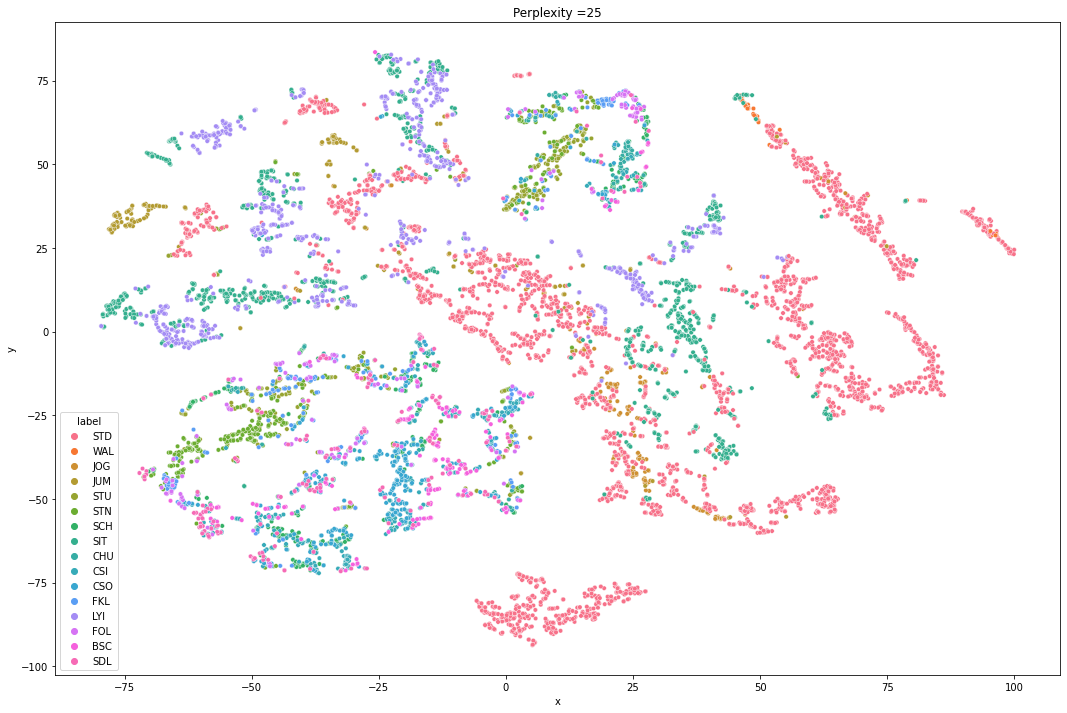

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


#Define size of bar plot
plt.figure(figsize=(18,12))
plt.title("Perplexity =25")
#ggplot(aes(x='Height', y='Weight', color='Gender'), data=df)  + geom_point()
sns.scatterplot(data=tsne_fit, x='x', y='y', hue='label', s= 20 )



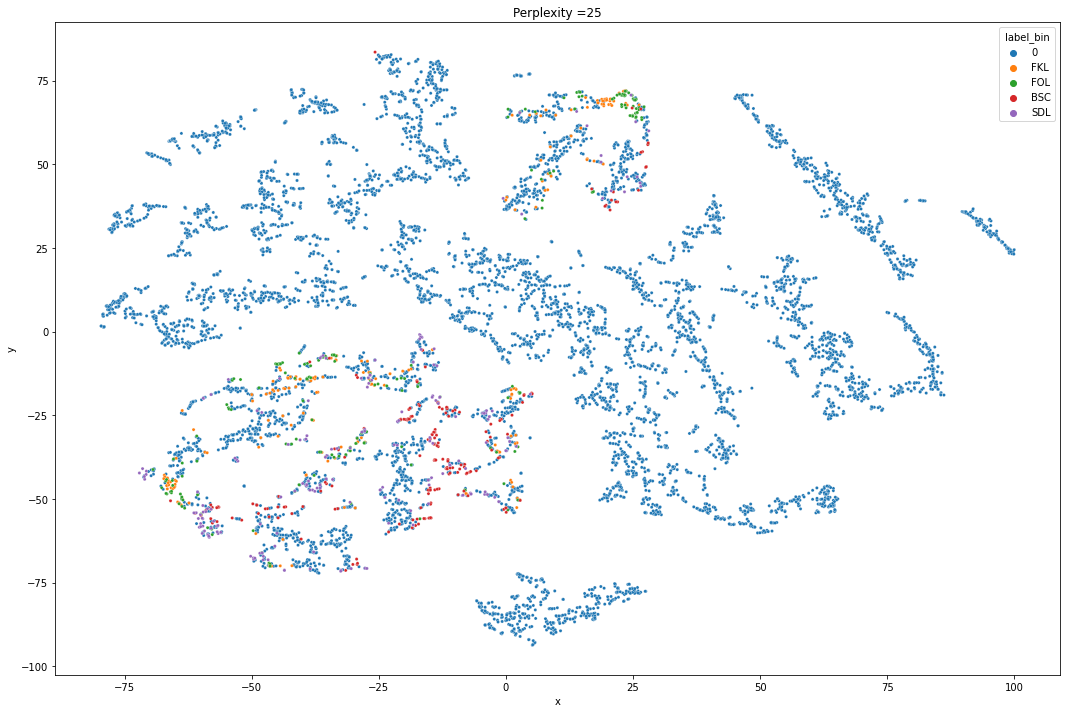

In [ ]:
#creating binary classifications
y_bin = master['label'].copy()

y_bin.replace(['STD', 'WAL', 'JOG', 'JUM', 'STU', 'STN', 'SCH', 'SIT', 'CHU', 'CSI', 'CSO', 'LYI'],0,inplace=True)
#y_bin.replace(['FKL', 'FOL', 'BSC', 'SDL'],1,inplace=True)

tsne_fit["label_bin"] = y_bin
plt.figure(figsize=(18,12))
plt.title("Perplexity =25")

sns.scatterplot(data=tsne_fit, x='x', y='y', hue='label_bin', s= 10 )


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


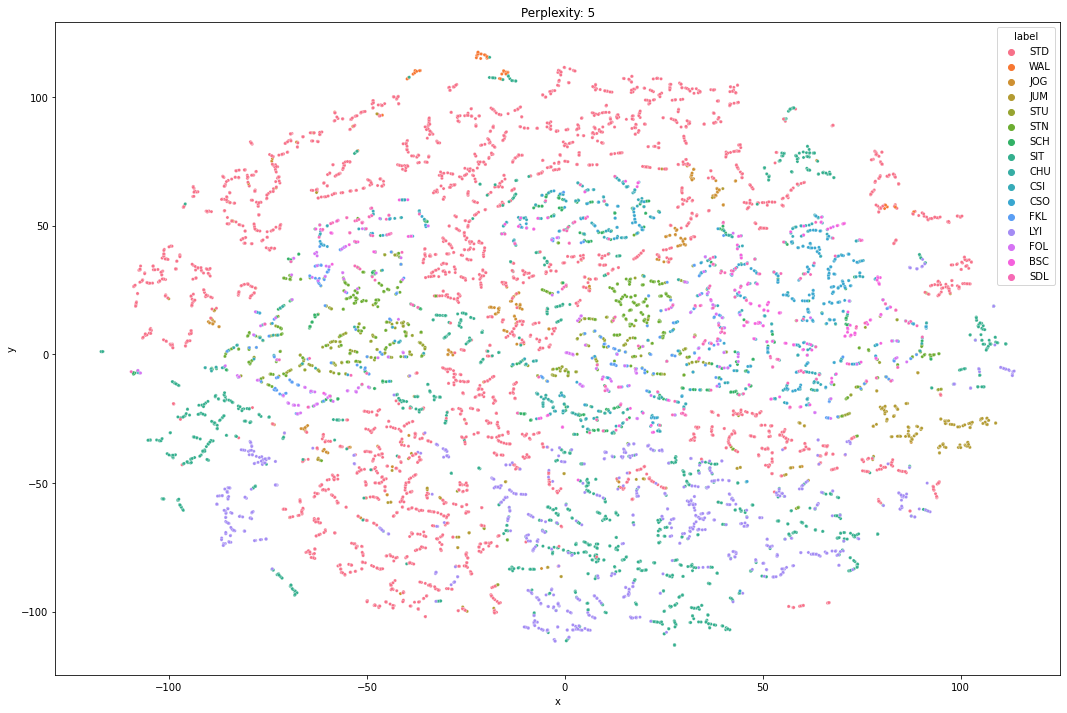

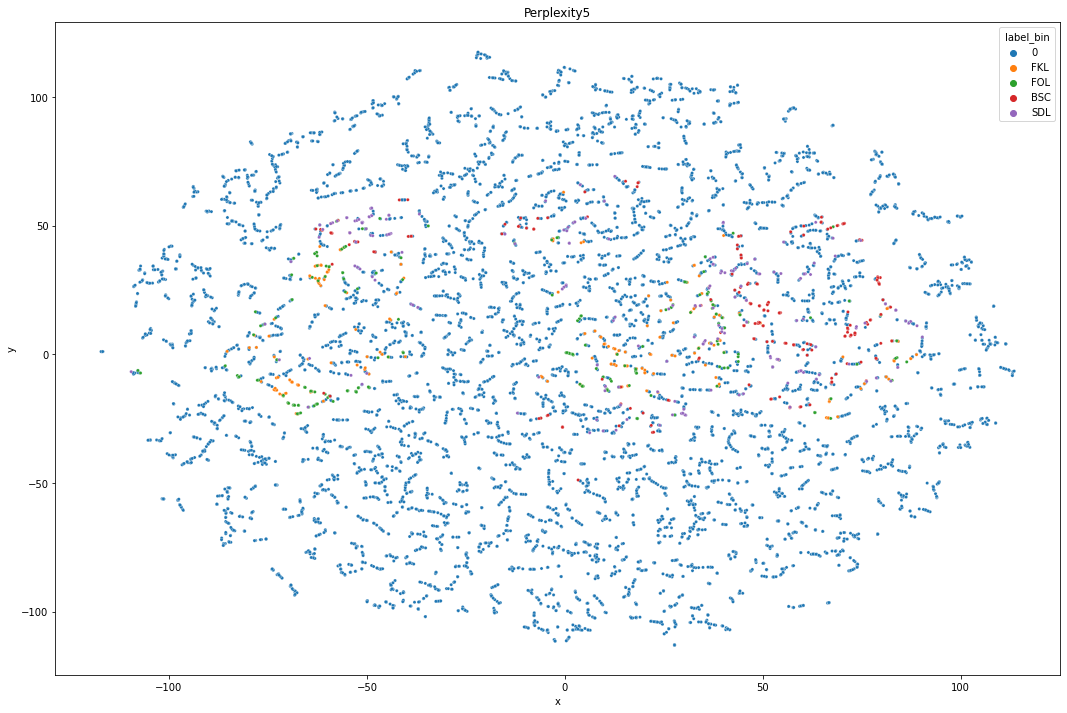

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


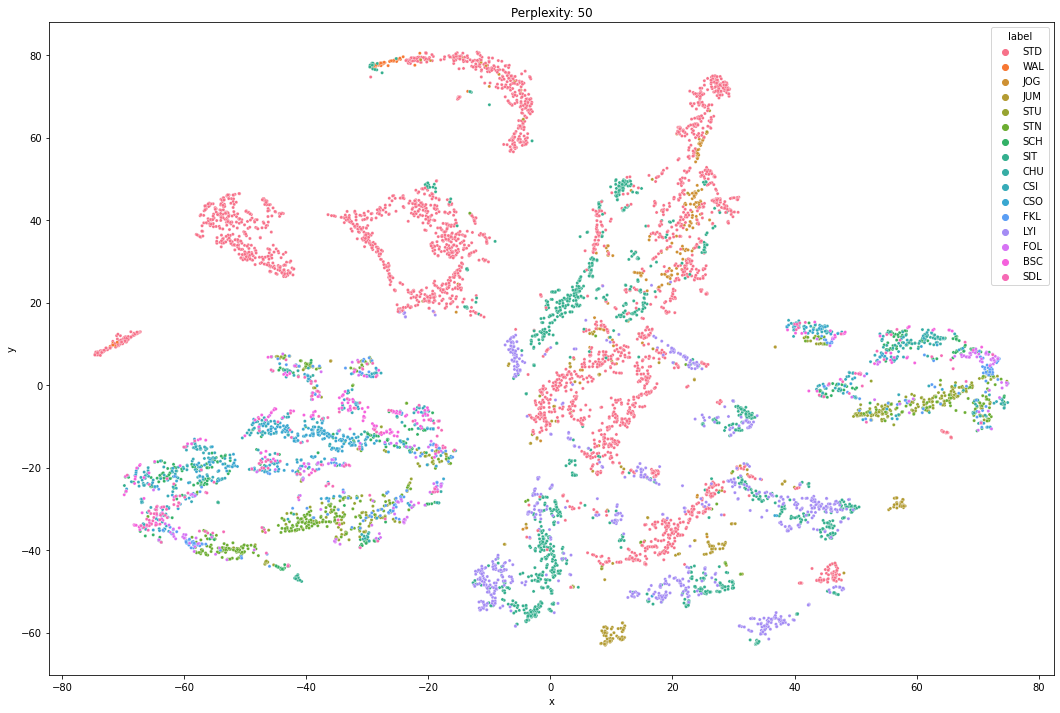

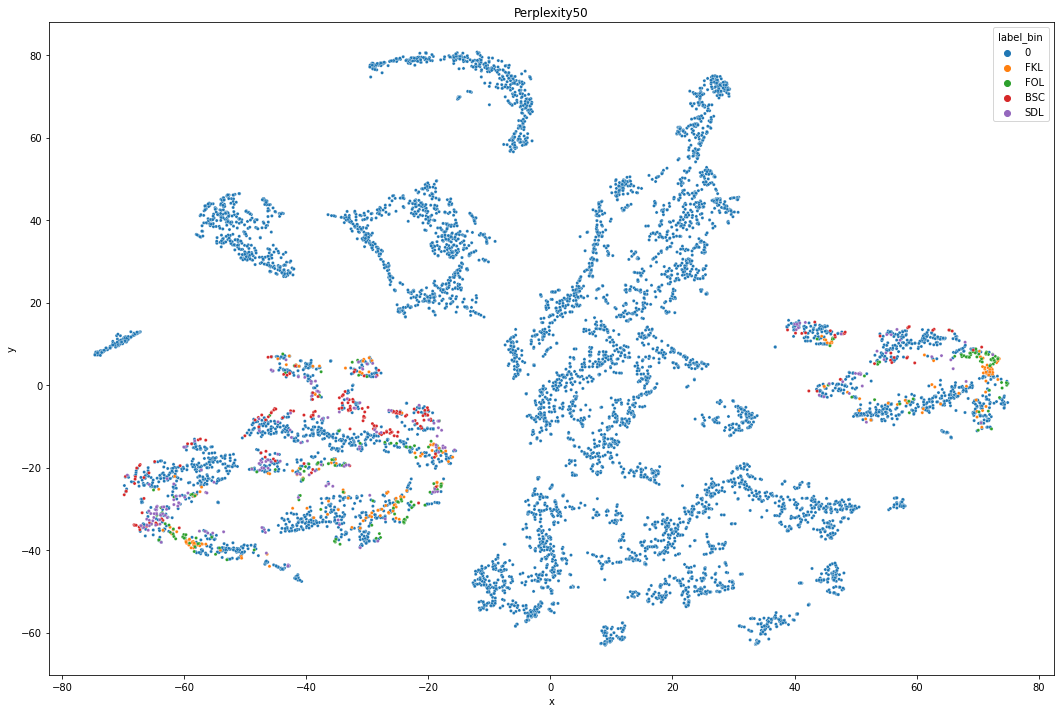

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


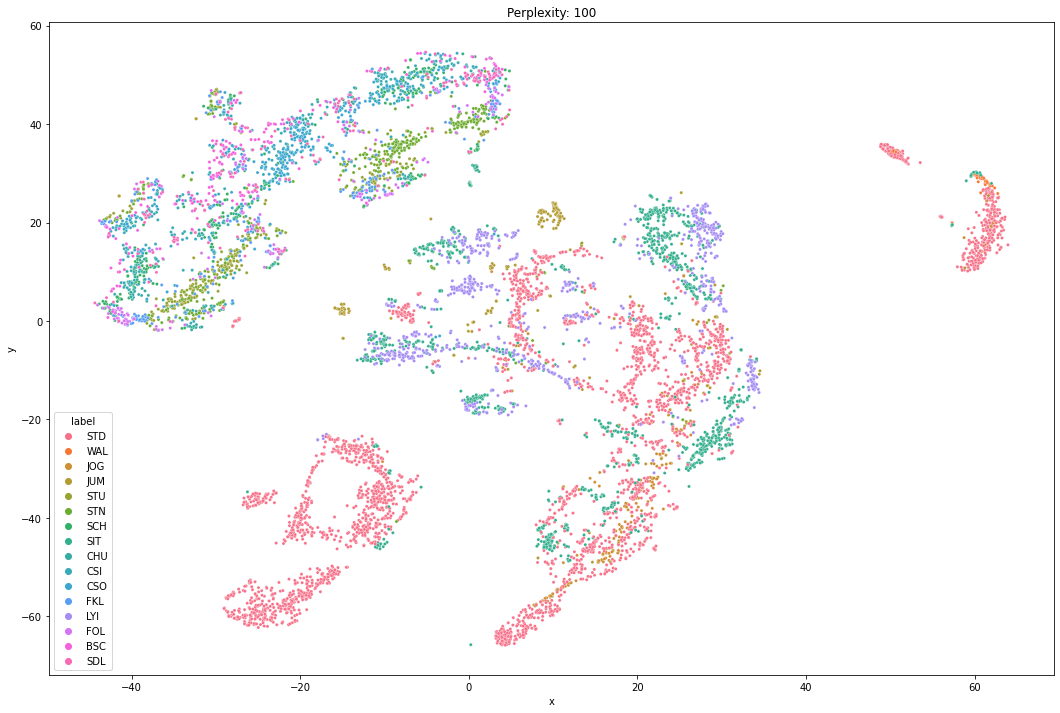

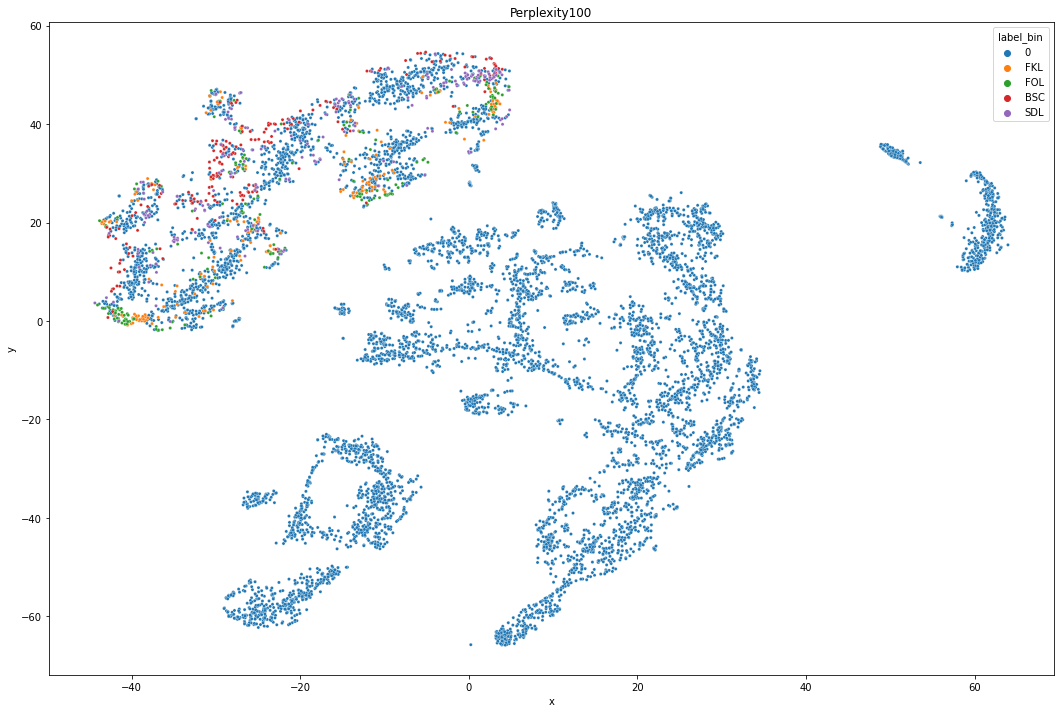

In [ ]:
perplexity_vals = [5,50, 100]

for i in perplexity_vals:
  
  tsne = TSNE(n_components=2, perplexity = i)
  fitted = tsne.fit_transform(X)
  tsne_fit = pd.DataFrame(fitted, columns = ["x" ,"y"])
  tsne_fit["label"] = y
  plt.figure(figsize=(18,12))
  plt.title("Perplexity:" + " " +str(i))
  sns.scatterplot(data=tsne_fit, x='x', y='y', hue='label', s= 10 )
  plt.show()
  plt.figure(figsize=(18,12))
  tsne_fit["label_bin"] = y_bin
  plt.title("Perplexity" + str(i))
  sns.scatterplot(data=tsne_fit, x='x', y='y', hue='label_bin', s= 10 )
  plt.show()



#Random Forrest Model- for interpretability

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import metrics 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



In [ ]:
y = master['label']
X = master.drop('label', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)


In [ ]:

#clf = RandomForestClassifier(n_estimators = 10, oob_score = True)
#clf.fit(X, y)


n_trees = list(range(2,100,2))
oob_score_list = []
accuracy_list = []

for i in n_trees:
    clf = RandomForestClassifier(n_estimators = i, oob_score = True)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    oob_score = clf.oob_score_
    oob_score_list.append(oob_score)
    accuracy_score = metrics.accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy_score)

#create plot to show relationship between numbers of trees and OOB score 

plt.plot(n_trees, oob_score_list)
plt.xlabel("n_estimators")
plt.ylabel("OOB score")
plt.title("Classification OOB Score as a Function of Number of trees")
plt.show()

plt.plot(n_trees, accuracy_list)
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.title("Classification Accuracy as a Function of Number of trees")
plt.show()

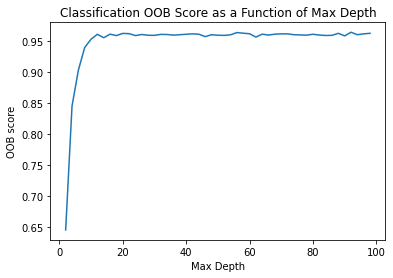

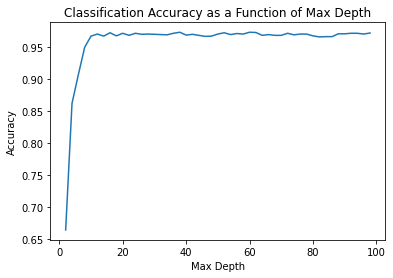

In [ ]:

#clf = RandomForestClassifier(n_estimators = 10, oob_score = True)
#clf.fit(X, y)


depth = list(range(2,100,2))
oob_score_list = []
accuracy_list = []

for i in n_trees:
    clf = RandomForestClassifier(n_estimators = 90, oob_score = True, max_depth = i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    oob_score = clf.oob_score_
    oob_score_list.append(oob_score)
    accuracy_score = metrics.accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy_score)

#create plot to show relationship between numbers of trees and OOB score 

plt.plot(n_trees, oob_score_list)
plt.xlabel("Max Depth")
plt.ylabel("OOB score")
plt.title("Classification OOB Score as a Function of Max Depth")
plt.show()

plt.plot(n_trees, accuracy_list)
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Classification Accuracy as a Function of Max Depth")
plt.show()

In [ ]:
max_acc = max(accuracy_list)
print(max_acc)
acc_index = accuracy_list.index(max_acc)
n_est = n_trees[acc_index]
print(n_est)
print(acc_index)
print(accuracy_list)

0.9716713881019831
92
45
[0.8733306353702954, 0.924322136786726, 0.934439498178875, 0.9469850263051396, 0.9498178874949413, 0.9571023876972885, 0.9554836098745447, 0.9611493322541481, 0.9591258599757183, 0.9651962768110077, 0.9595305544314043, 0.9631728045325779, 0.9635774989882638, 0.9635774989882638, 0.9627681100768919, 0.9664103601780656, 0.9660056657223796, 0.9664103601780656, 0.9672197490894374, 0.961554026709834, 0.9635774989882638, 0.9680291380008094, 0.9680291380008094, 0.9684338324564954, 0.9660056657223796, 0.9684338324564954, 0.9696479158235533, 0.9672197490894374, 0.9696479158235533, 0.9696479158235533, 0.9672197490894374, 0.971266693646297, 0.9688385269121813, 0.9708619991906111, 0.9664103601780656, 0.9680291380008094, 0.9700526102792392, 0.9680291380008094, 0.9704573047349251, 0.9704573047349251, 0.9708619991906111, 0.9660056657223796, 0.971266693646297, 0.9656009712666936, 0.9696479158235533, 0.9716713881019831, 0.971266693646297, 0.9696479158235533, 0.9684338324564954]


In [ ]:

#create function to plot importances

def plot_feature_importance(importance,names,model_type):
  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)

  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data) 
  #keep only the top 20 features
  fi_df= fi_df.head(5)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')


def importance_dataframe(importance,names,model_type):
    #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)

  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data) 
  return fi_df



ACCURACY OF THE MODEL:  0.9607446377984622
OOB Score 0.9607979184735472
None


feature_names  feature_importance
0             acc_x            0.004004
1             acc_y            0.029091
2             acc_z            0.029703
3            gyro_x            0.008543
4            gyro_y            0.005809
..              ...                 ...
73      jerk_Fpitch            0.015499
74       jerk_Froll            0.013163
75     F_JerkMagAcc            0.034241
76    F_JerkMagGyro            0.006210
77  F_JerkMagOrient            0.016719

[78 rows x 2 columns]

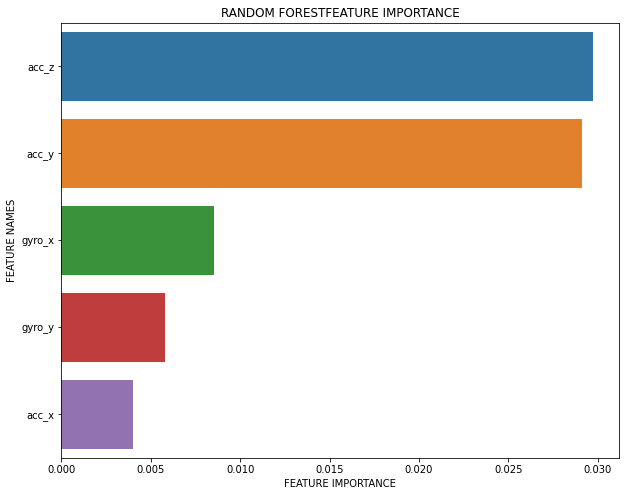

In [ ]:
#finding the most important features
#using 50 treees
clf = RandomForestClassifier(n_estimators = 80, criterion = "gini",oob_score = True, max_depth = 30)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
#calculate accuracy score
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
#calculate OOB score
oob_score = clf.oob_score_
print("OOB Score",oob_score)


print(plot_feature_importance(clf.feature_importances_,X.columns,'RANDOM FOREST'))
feature_importances = importance_dataframe(clf.feature_importances_,X.columns,'RANDOM FOREST')
feature_importances



In [ ]:
clf = RandomForestClassifier(n_estimators = 60, criterion = "entropy",oob_score = True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
#calculate accuracy score
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
#calculate OOB score
oob_score = clf.oob_score_
print("OOB Score",oob_score)


print(plot_feature_importance(clf.feature_importances_,X.columns,'RANDOM FOREST'))
feature_importances = importance_dataframe(clf.feature_importances_,X.columns,'RANDOM FOREST')
feature_importances



In [ ]:
#using top three feature to visualize data :
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure





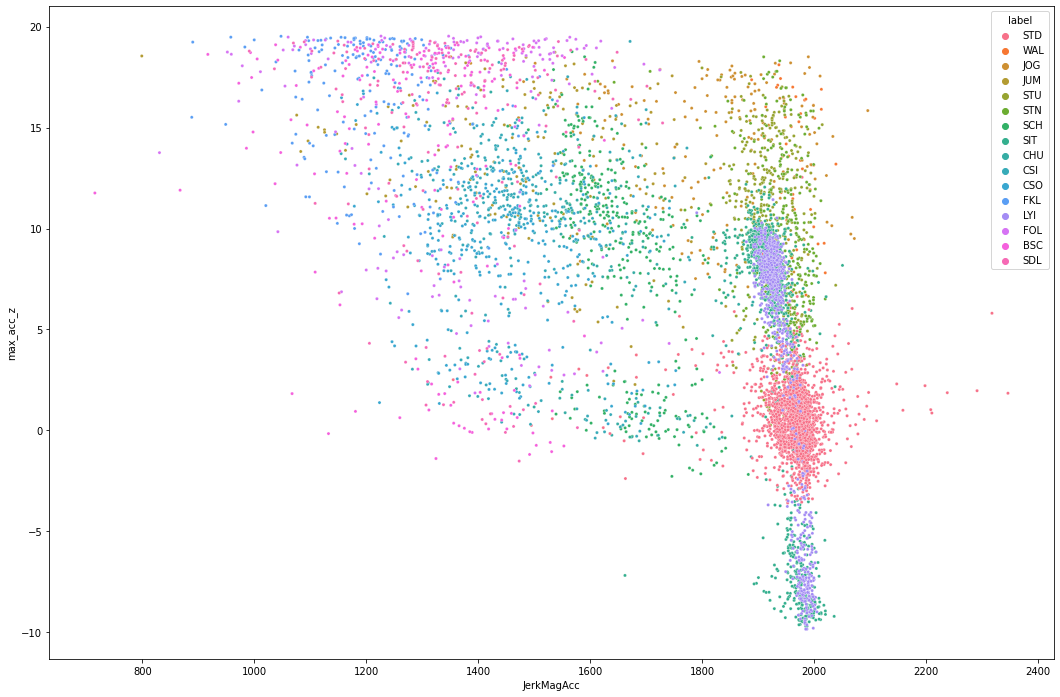

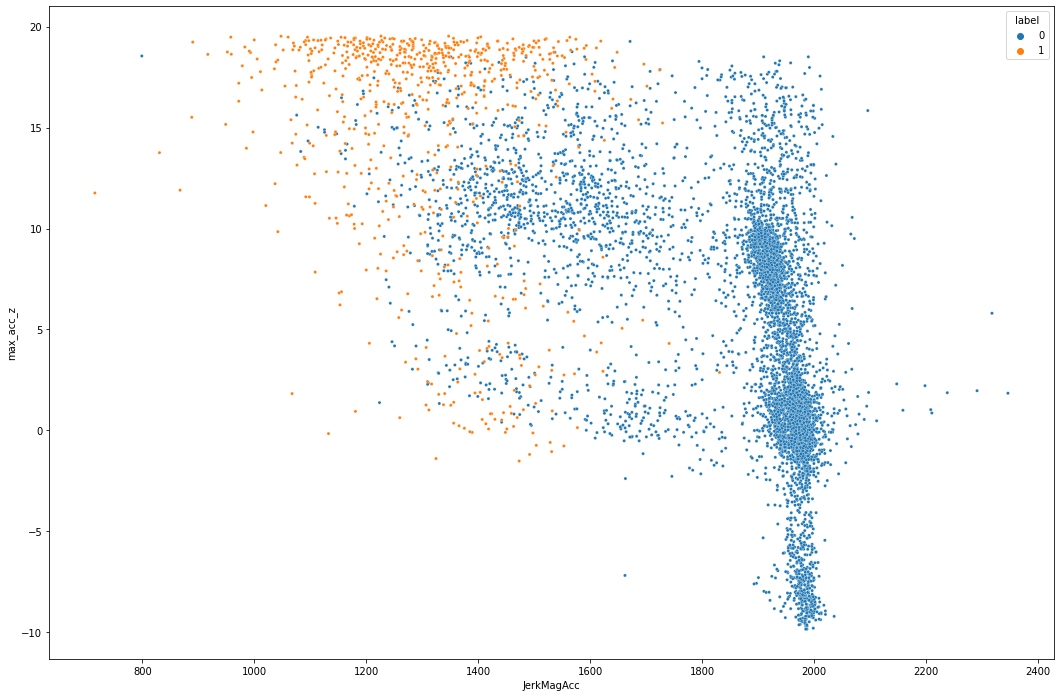

In [ ]:
feature1= 'JerkMagAcc'
feature2= 'max_acc_z'

processed = master.copy()
plt.figure(figsize=(18,12))
sns.scatterplot(data=processed, x= feature1, y= feature2, hue='label', s= 10 )

#create copy of data set
master_binary = master.copy()

master_binary['label'].replace(['STD', 'WAL', 'JOG', 'JUM', 'STU', 'STN', 'SCH', 'SIT', 'CHU', 'CSI', 'CSO', 'LYI'],0,inplace=True)
master_binary['label'].replace(['FKL', 'FOL', 'BSC', 'SDL'],1,inplace=True)
plt.figure(figsize=(18,12))
sns.scatterplot(data=master_binary, x= feature1, y= feature2, hue='label', s= 10 )


##Neural Network

In [ ]:
master

label     acc_x      acc_y     acc_z    gyro_x    gyro_y    gyro_z  \
0      STD -0.854436   9.642310 -2.250488  0.004283  0.000140  0.007415   
1      STD  1.055158   9.685528  1.733203  0.002060  0.001796  0.009070   
2      STD -2.135354   9.659697  0.082741 -0.003259 -0.002110  0.004561   
3      STD -2.098517   9.567071  1.188102 -0.016764  0.001900  0.008769   
4      STD  1.643435   9.790809 -0.278615 -0.002561 -0.004125  0.004378   
...    ...       ...        ...       ...       ...       ...       ...   
8231   SDL -1.614871   3.619486  5.292432 -0.407888  0.475601 -0.145117   
8232   STD  2.054522   9.699086  0.133555 -0.181134  0.085751  0.009688   
8233   LYI -7.496127  -0.954398  5.997271 -0.007828 -0.018037  0.009056   
8234   SDL -3.730302   3.069642  5.021443 -0.538789  0.350284 -0.094782   
8235   STD -1.399266  10.112025  1.050717 -0.014155 -0.036117 -0.030202   

         azimuth       pitch       roll  ...  jerk_Facc_z  jerk_Fgyro_x  \
0     306.164137 -104.041694  -4.930065  ...     0.224490      0.039122   
1     293.992181  -78.026729   6.115445  ...     0.244479      0.121223   
2     105.837462  -86.562022 -12.094852  ...     0.321017      0.095744   
3      46.677027  -73.325690 -16.421131  ...     0.180347      0.034797   
4     265.318943  -98.935069   9.453252  ...     0.128879      0.029659   
...          ...         ...        ...  ...          ...           ...   
8231  240.184677  -26.478097  -7.319636  ...     9.878486      1.616140   
8232  252.279227  -41.790419 -21.487358  ...   188.795136     34.629590   
8233  257.736227    6.139357 -49.575215  ...    16.426087      3.970988   
8234  253.217327  -24.840463 -26.467930  ...     6.671080      1.579303   
8235  239.312780  -49.442869 -29.559112  ...   185.199440     34.981985   

      jerk_Fgyro_y  jerk_Fgyro_z  jerk_Fazimuth  jerk_Fpitch  jerk_Froll  \
0         0.058791      0.029565      23.754628     6.376173    2.693552   
1         0.120939      0.036666      16.764187     4.791044    2.325317   
2         0.206433      0.061043       8.301730    16.300686    1.844404   
3         0.063123      0.030626      21.982975     2.620552    1.006353   
4         0.046507      0.026777       8.427963     5.887029    1.619819   
...            ...           ...            ...          ...         ...   
8231      3.162145      1.178608       9.071858     2.132893    7.389333   
8232     41.967951     27.664550    2906.615780   572.227099  795.690569   
8233      5.215307      4.135967      36.486733    61.784799   35.265612   
8234      2.845252      1.991766      15.350096    18.901771    2.263543   
8235     42.343241     33.682171    2782.177737   567.349678  766.303109   

      F_JerkMagAcc  F_JerkMagGyro  F_JerkMagOrient  
0         0.405974       0.076557        24.742537  
1         0.448741       0.175116        17.589746  
2         0.660672       0.235601        18.385671  
3         0.395839       0.078315        22.161481  
4         0.345504       0.061315        10.407281  
...            ...            ...              ...  
8231     15.452782       3.741682        11.893279  
8232    343.770523      61.039698      3067.406498  
8233     33.605760       7.750767        79.951901  
8234     13.836533       3.815336        24.454570  
8235    338.268236      64.429635      2941.023473  

[8236 rows x 79 columns]

In [ ]:
y = master['label']
X = master.drop('label', axis=1)

scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.20, random_state=0)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

mlp_gs = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(100,1), (50,100,50), (50,50,50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train, y_train) # X is train samples and y is the corresponding labels

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(100, 1), (50, 100, 50),
                                                (50, 50, 50)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [ ]:
print("Best parameters are: ", clf.best_params_)

Best parameters are:  {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}


In [ ]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.473 (+/-0.082) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 1), 'learning_rate': 'constant', 'solver': 'sgd'}
0.498 (+/-0.069) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 1), 'learning_rate': 'constant', 'solver': 'adam'}
0.487 (+/-0.063) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 1), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.475 (+/-0.086) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 1), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.872 (+/-0.024) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.966 (+/-0.009) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.869 (+/-0.019) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.967 (+/

In [ ]:
y_true, y_pred = y_test , clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       644
           1       1.00      1.00      1.00        12
           2       1.00      0.90      0.95        40
           3       0.88      1.00      0.94        30
           4       0.95      0.94      0.94        63
           5       0.91      0.93      0.92        69
           6       1.00      1.00      1.00        80
           7       1.00      0.98      0.99       242
           8       1.00      1.00      1.00        25
           9       0.94      0.95      0.94        61
          10       0.97      0.99      0.98        67
          11       0.91      0.91      0.91        46
          12       0.81      0.78      0.80        45
          13       0.79      0.94      0.86        35
          14       0.81      0.67      0.73        39
          15       0.99      1.00      1.00       150

    accuracy                           0.97      1648
   macro avg       0.94   